In [80]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [81]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy. stats as stats
from sklearn.metrics import mean_squared_error
import datetime
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import r2_score


In [82]:
df = pd.read_csv(r"C:\MY FILE\MBAN 6110S-Data Science\assignment3\kc_house_data.csv")

In [83]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [84]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


Data quality issues 
- convert datatype:  
        ' date' /''yr_built'/ 'yr_renovated' / 'zipcode'

- Remove outliers
     

- convert to dummie variables: 'waterfront', 'view', 'grade','condition


In [85]:
df['date'] = pd.to_datetime(df['date'])
#df['yr_built'] = pd.to_datetime(df['yr_built'])
#df['yr_renovated'] = pd.to_datetime(df['yr_renovated'])
#df['zipcode'] = df['zipcode'].astype(object)
#df['waterfront'] = df['waterfront'].astype(bool)
#df['view'] = df['view'].astype(object)
#df['grade'] = df['grade'].astype(object)


In [86]:
current_year = datetime.datetime.now().year
df['house_age'] = current_year - df['yr_built']
df['reno_age'] = current_year - df['yr_renovated']
#df['price_per_sqft'] = df['price']/df['sqft_living']

In [87]:
# create dummie variables 
#dummies_view = pd.get_dummies(df.view, prefix= 'view', dtype= int)
#dummies_waterfront = pd.get_dummies(df.waterfront, prefix='wf',dtype =int)
#dummies_grade = pd.get_dummies(df.grade, prefix='grade', dtype = int)
#dummies_condition = pd.get_dummies(df.condition, prefix='condition', dtype= int)
#df = pd.concat([df,dummies_view,dummies_waterfront,dummies_condition,dummies_grade], axis=1)

#df2.head()


In [88]:
# extract year, month and create new columns 
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [89]:
#drop columns
df = df.drop('id', axis=1)
df = df.drop('date', axis=1)

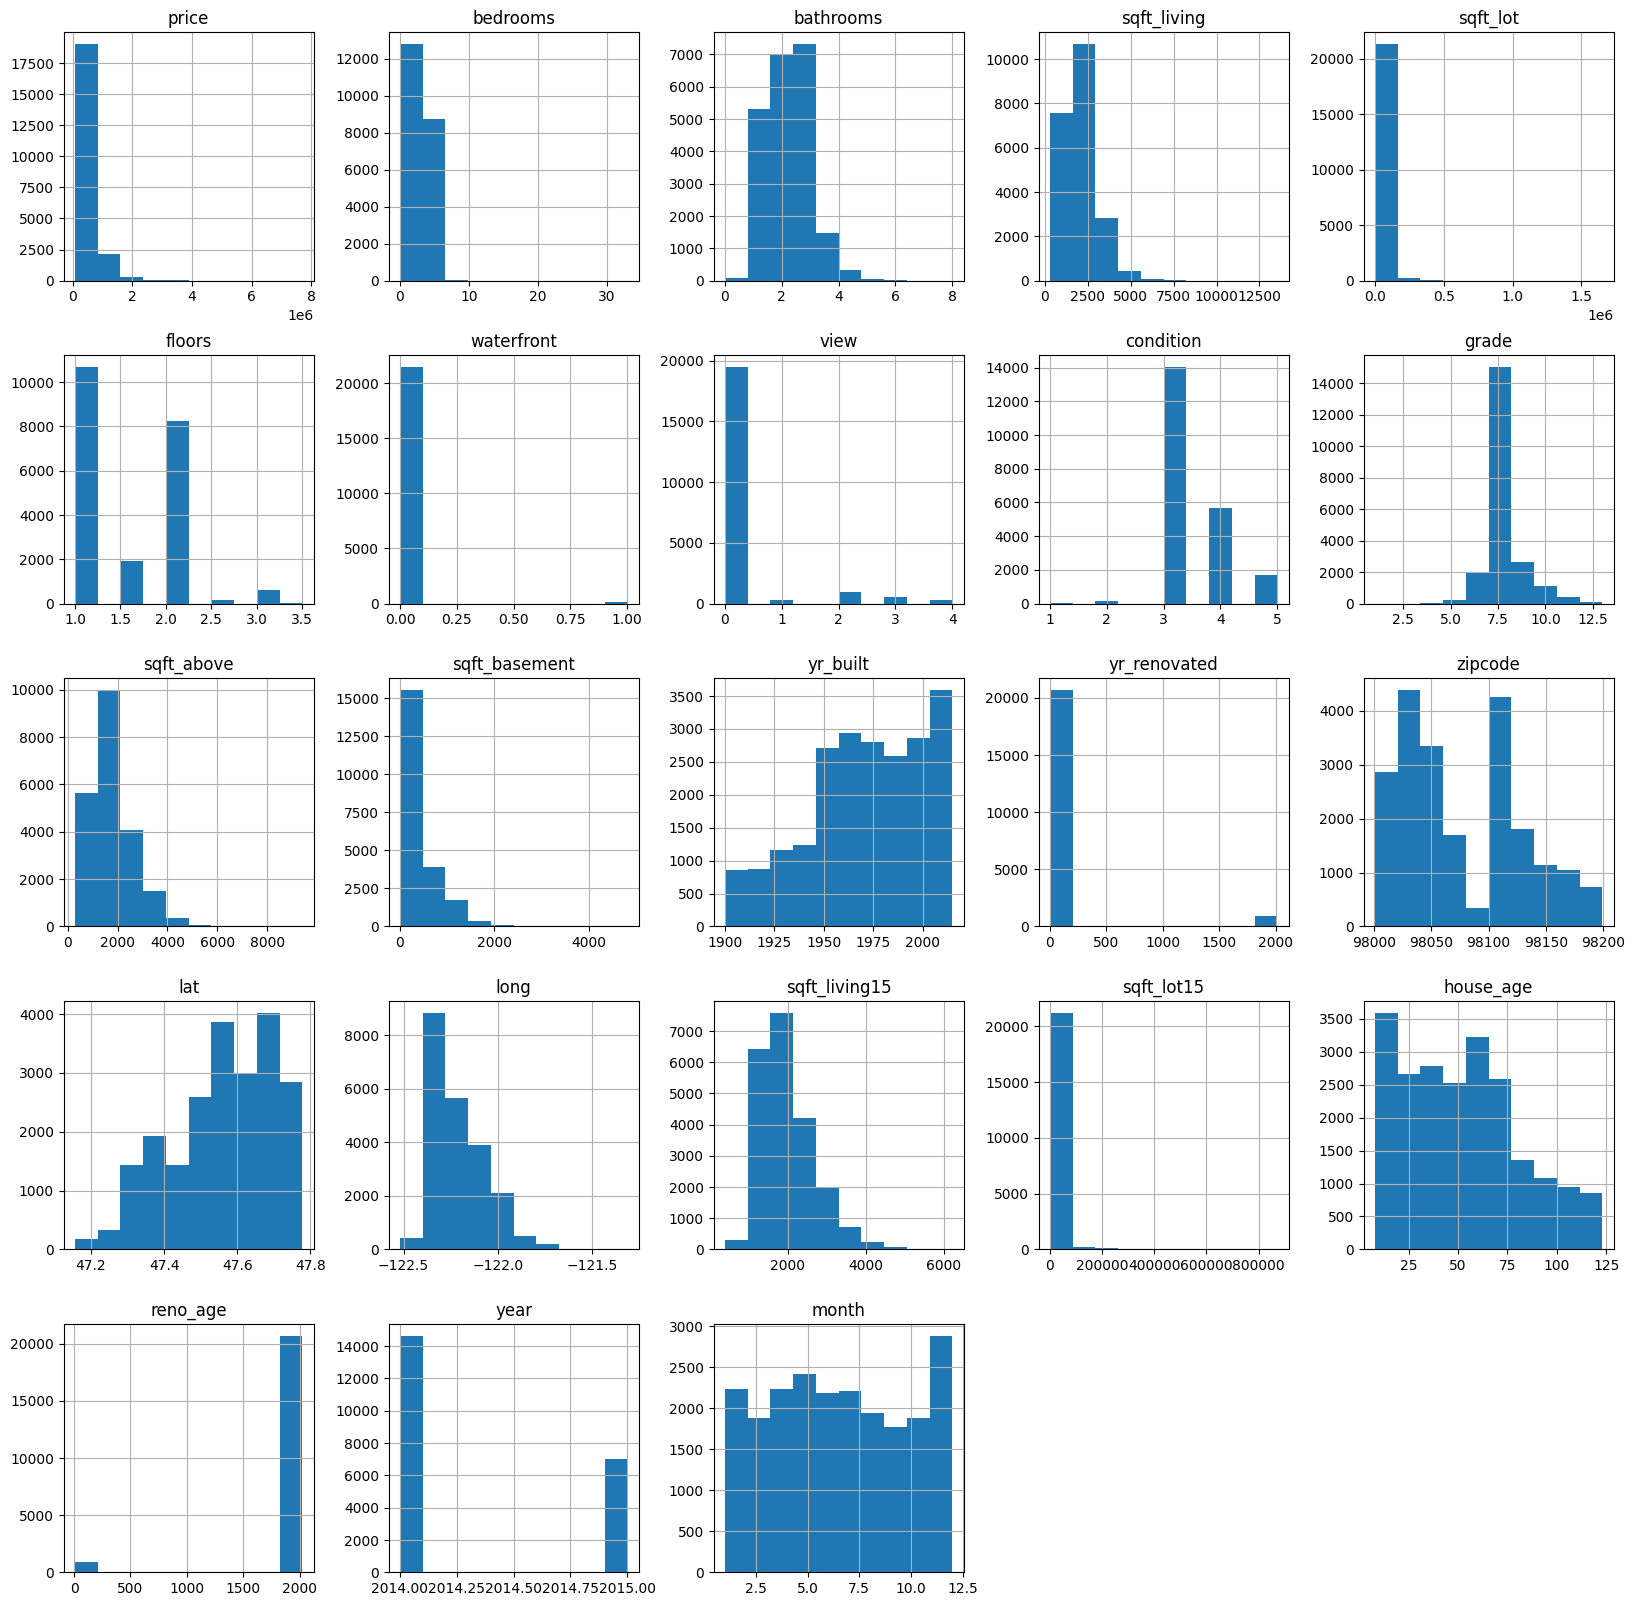

In [90]:
# check the distributions
df.hist(figsize=(20,20))
plt.show()

 Check and drop outliers which are fall outside of boxplot

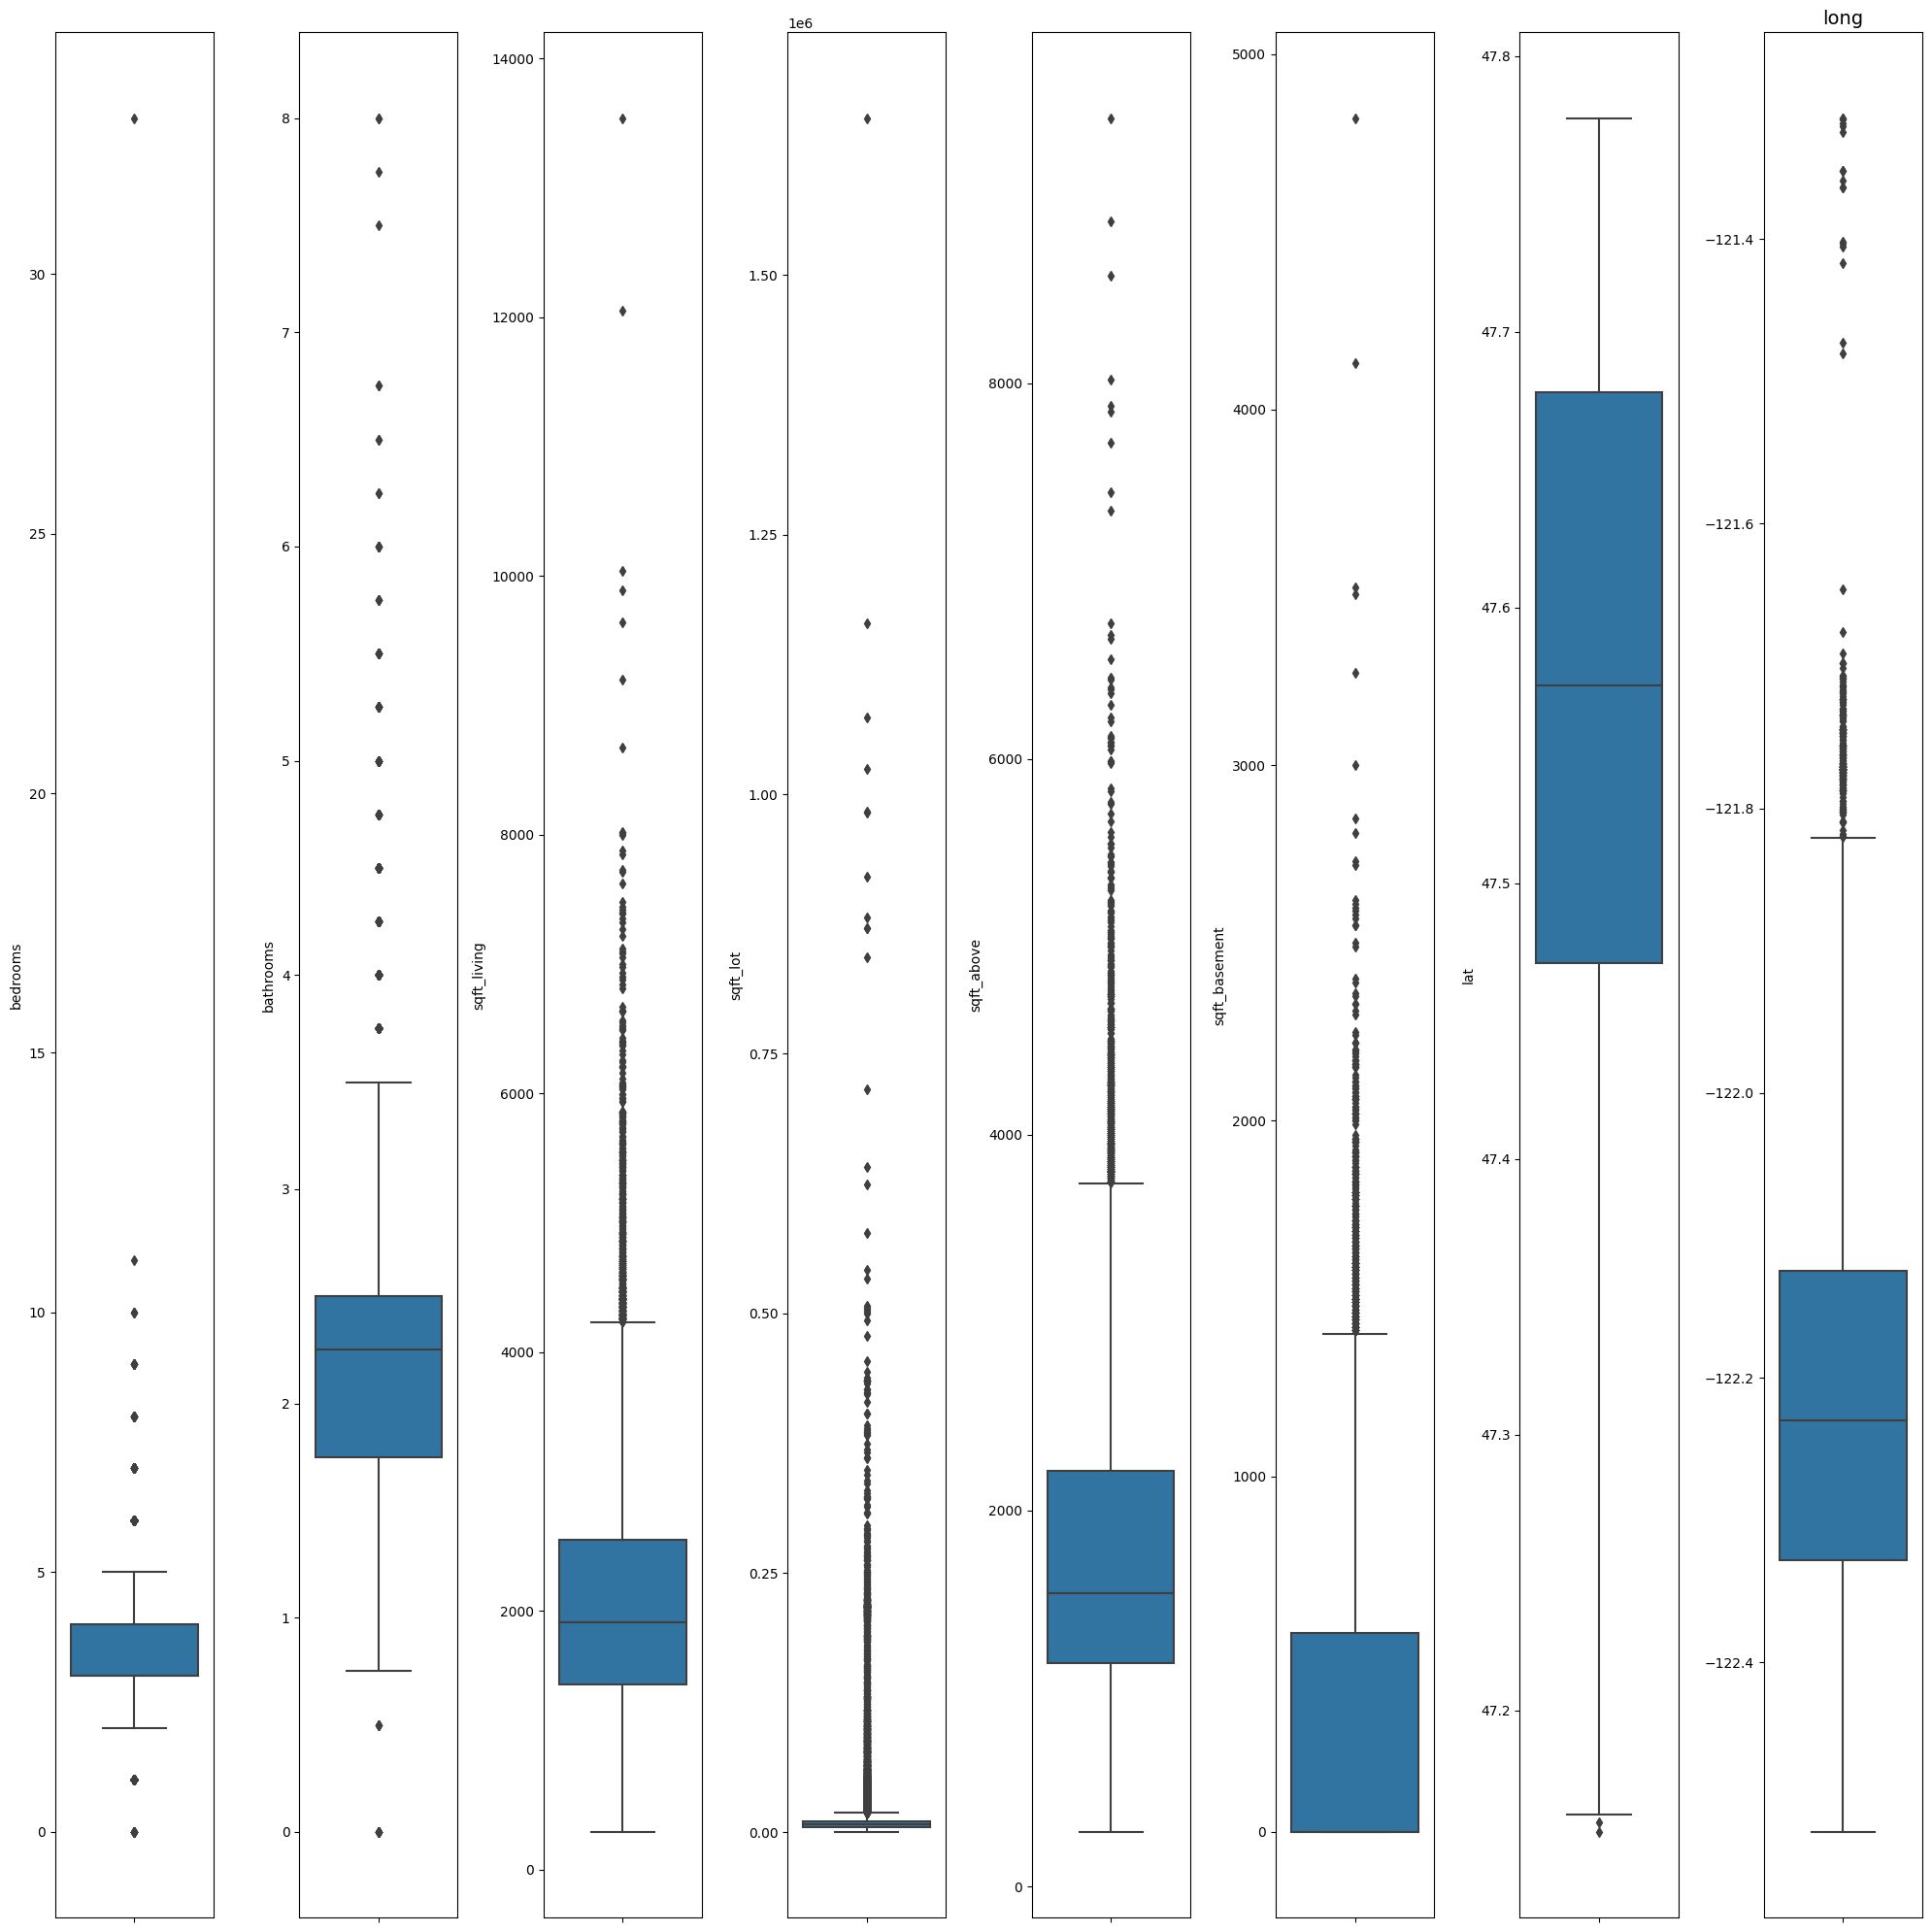

In [91]:
cols =['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat','long']

flg, axes = plt.subplots(1, len(cols), figsize=(20,20))

for i, col in enumerate(cols):
    sns.boxplot(y=col, data=df, ax=axes[i])
axes[i].set_title(col, fontsize=14)
axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'bedrooms')

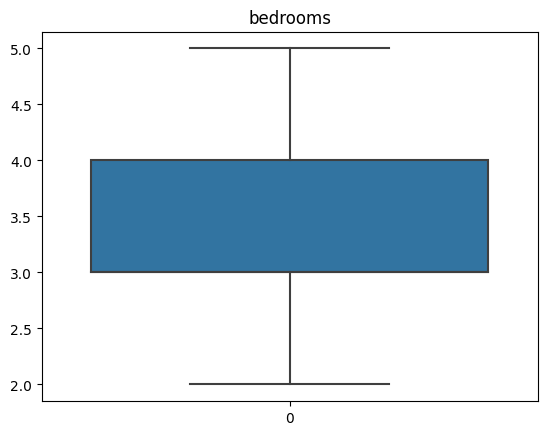

In [92]:
df = df.drop(df[df['bedrooms'] > 5].index)
df = df.drop(df[df['bedrooms'] < 2].index)
sns.boxplot(df['bedrooms'])
plt.title('bedrooms')



Text(0.5, 1.0, 'sqft_living')

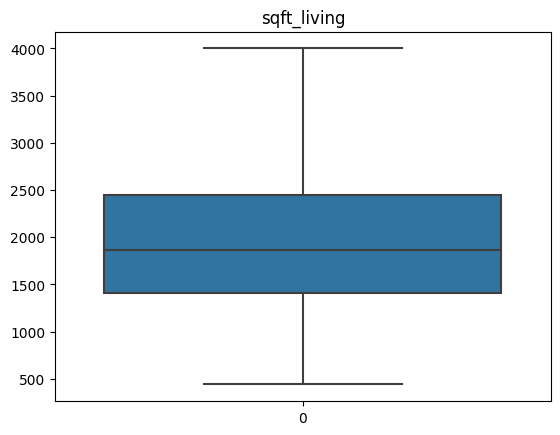

In [93]:
df = df.drop(df[df['sqft_living'] > 4000].index)
df = df.drop(df[df['sqft_living'] < 290].index)
sns.boxplot(df['sqft_living'])
plt.title('sqft_living')

In [94]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'bathrooms')

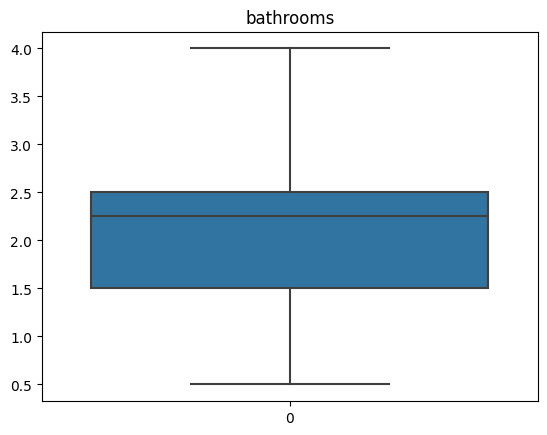

In [95]:
df = df.drop(df[df['bathrooms'] >4].index)
sns.boxplot(df['bathrooms'])
plt.title('bathrooms')

In [96]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'sqft_lot')

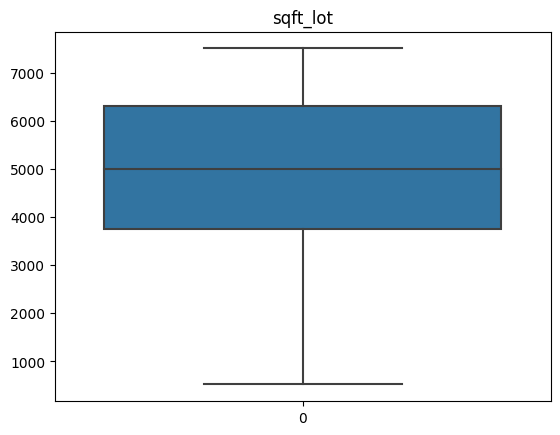

In [97]:
df = df.drop(df[(df['sqft_lot'] > 7500)].index)
df = df.drop(df[df['sqft_lot'] < 520].index)
sns.boxplot(df['sqft_lot'])
plt.title('sqft_lot')

Text(0.5, 1.0, 'sqft_basement')

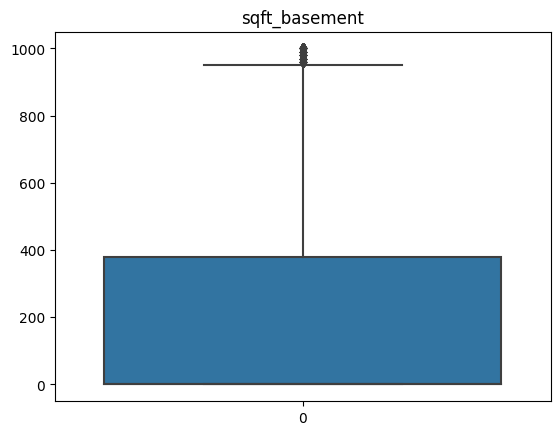

In [98]:
df = df.drop(df[df['sqft_basement'] >1000].index)
sns.boxplot(df['sqft_basement'])
plt.title('sqft_basement')

Text(0.5, 1.0, 'sqft_living15')

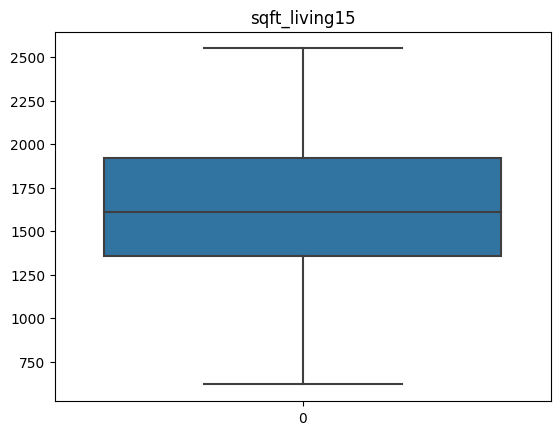

In [99]:
df = df.drop(df[df['sqft_living15'] >2550].index)
sns.boxplot(df['sqft_living15'])
plt.title('sqft_living15')

In [100]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'sqft_lot15')

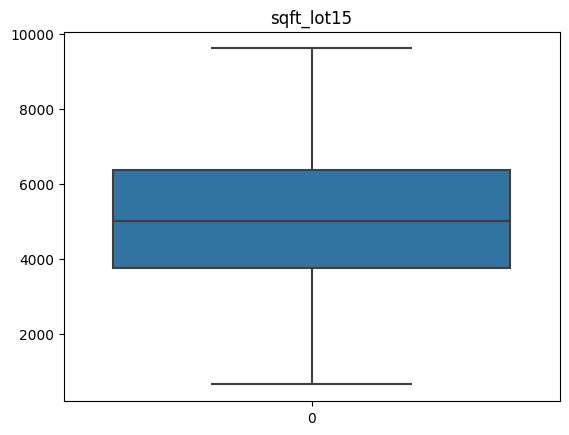

In [101]:
df = df.drop(df[df['sqft_lot15'] >9621].index)
sns.boxplot(df['sqft_lot15'])
plt.title('sqft_lot15')

In [102]:
df = df.drop(df[df['sqft_above'] > 1800].index)
df = df.drop(df[df['sqft_above'] < 1190].index)



In [103]:
df['sqft_above'] = df['sqft_above'].astype(int)


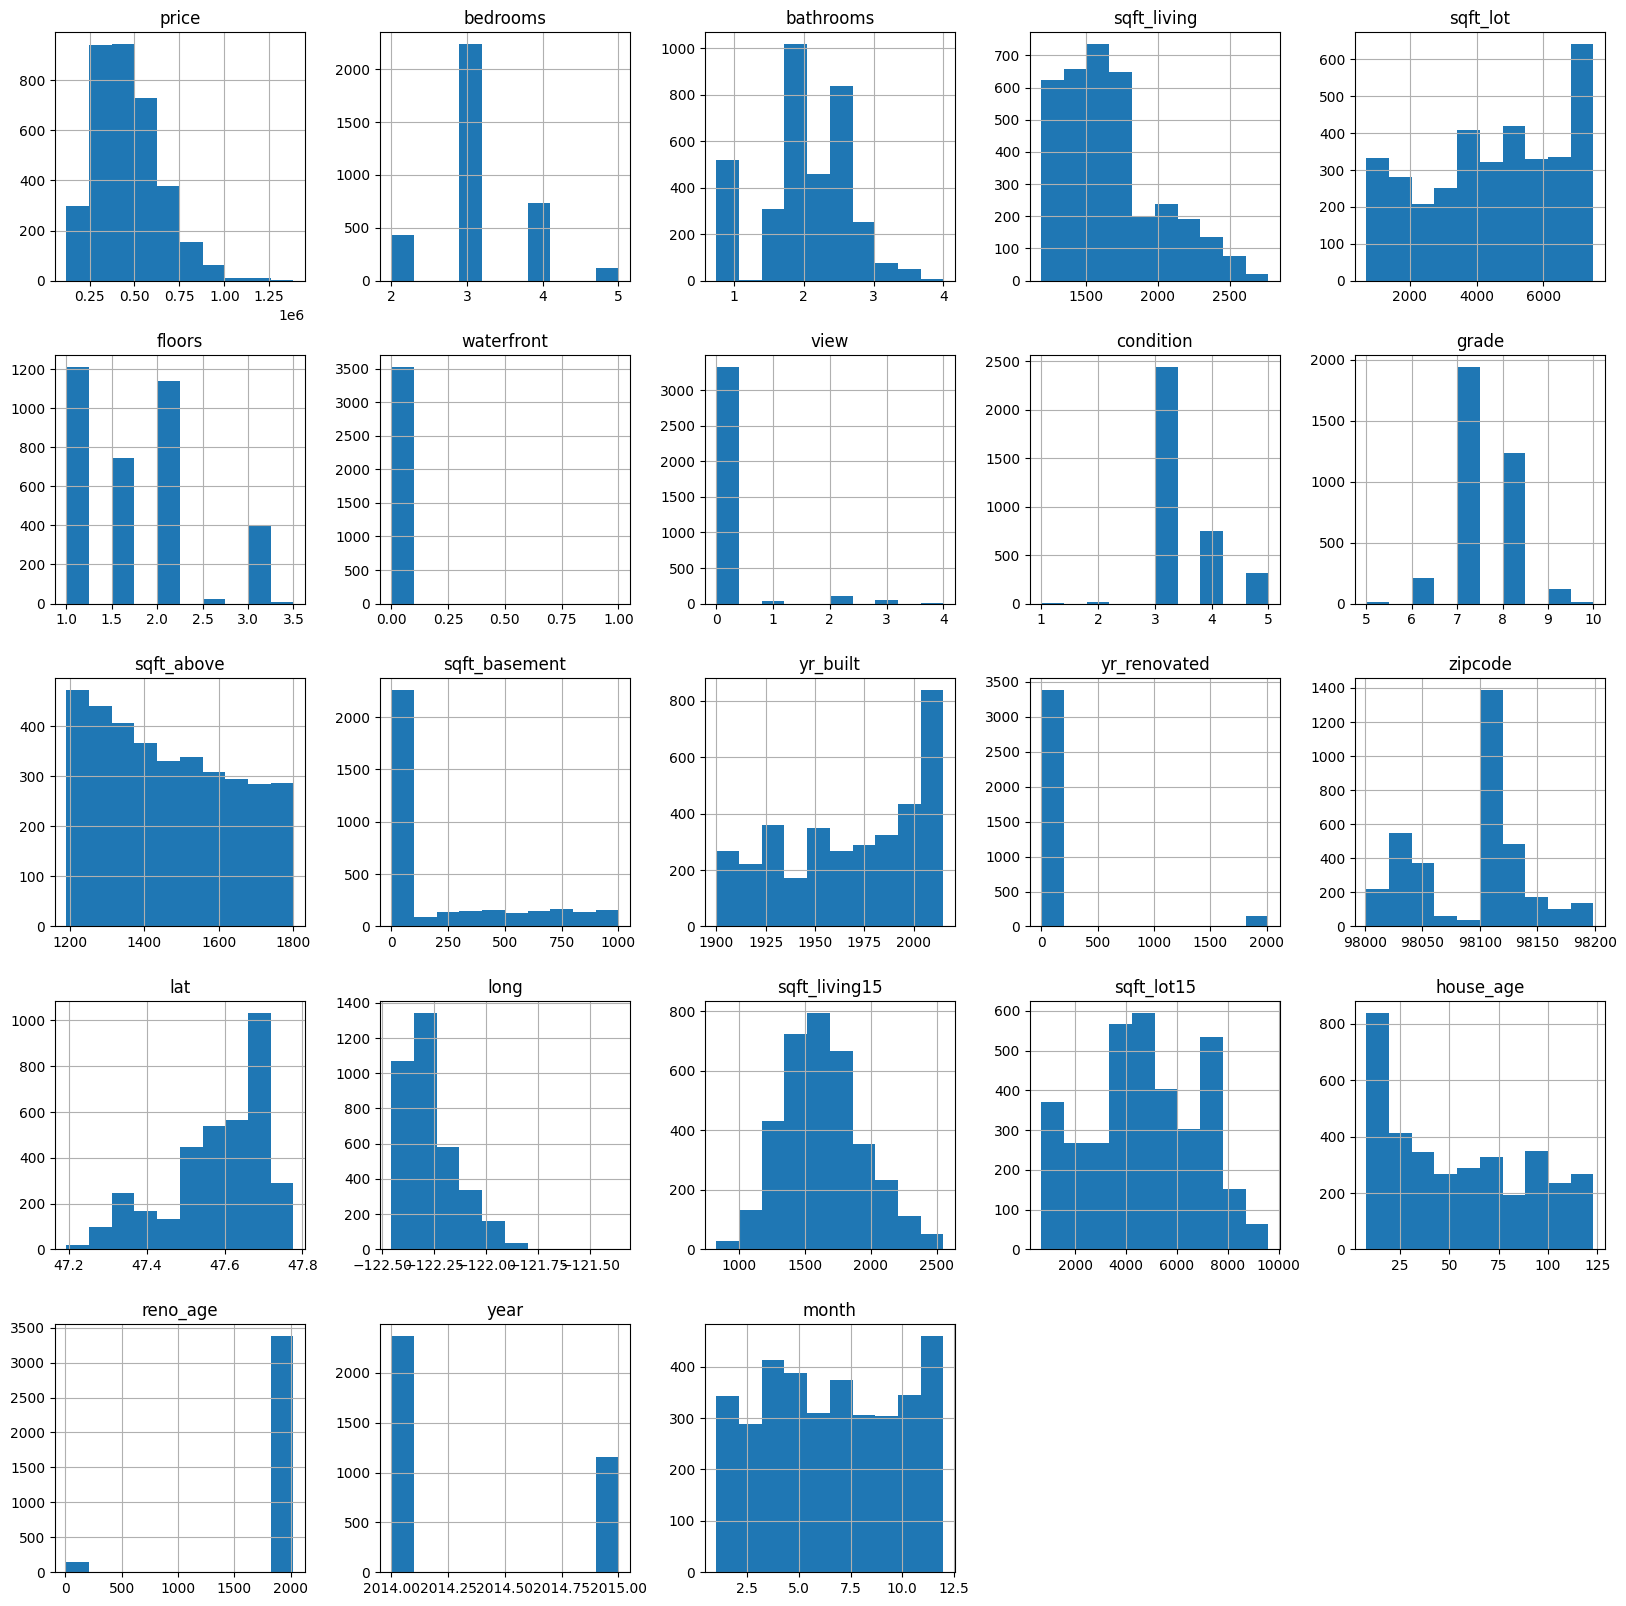

In [104]:
# check the distributions
df.hist(figsize=(20,20))
plt.show()

By checking correlations , to select the variables for building models


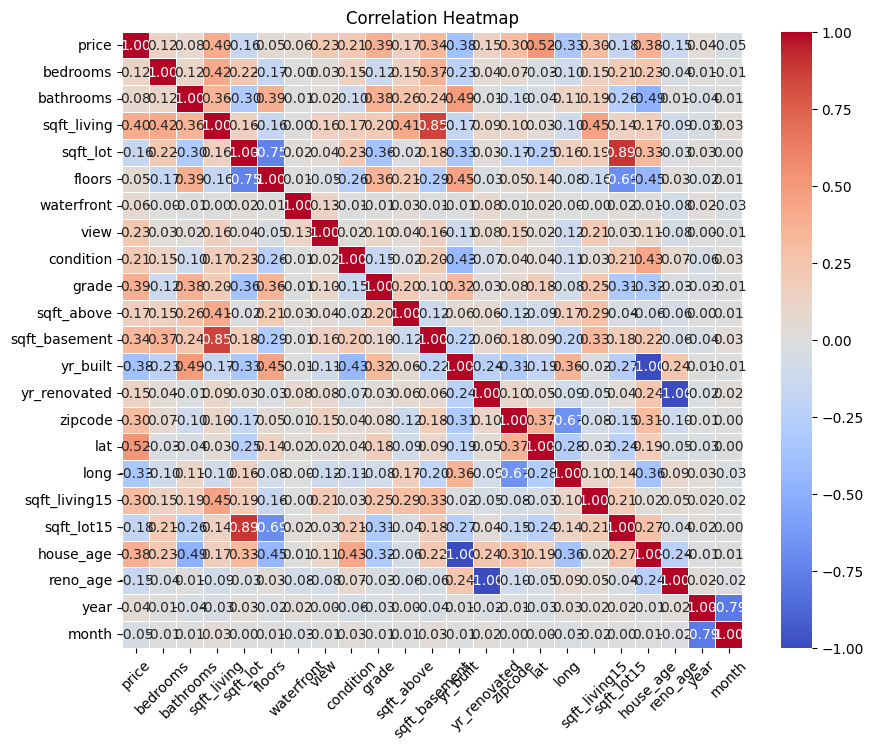

In [105]:
df_corr = df.corr()
df_corr

plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

using stastic model 

In [106]:
correlations = df.corr()['price'].sort_values(ascending=False)
correlations

price            1.000000
lat              0.521590
sqft_living      0.402409
grade            0.390598
house_age        0.378639
sqft_basement    0.343677
zipcode          0.304309
sqft_living15    0.303818
view             0.225217
condition        0.211344
sqft_above       0.167206
yr_renovated     0.148396
bedrooms         0.123762
bathrooms        0.079858
waterfront       0.064072
floors           0.054278
year             0.043461
month           -0.054574
reno_age        -0.148396
sqft_lot        -0.155314
sqft_lot15      -0.176452
long            -0.326024
yr_built        -0.378639
Name: price, dtype: float64

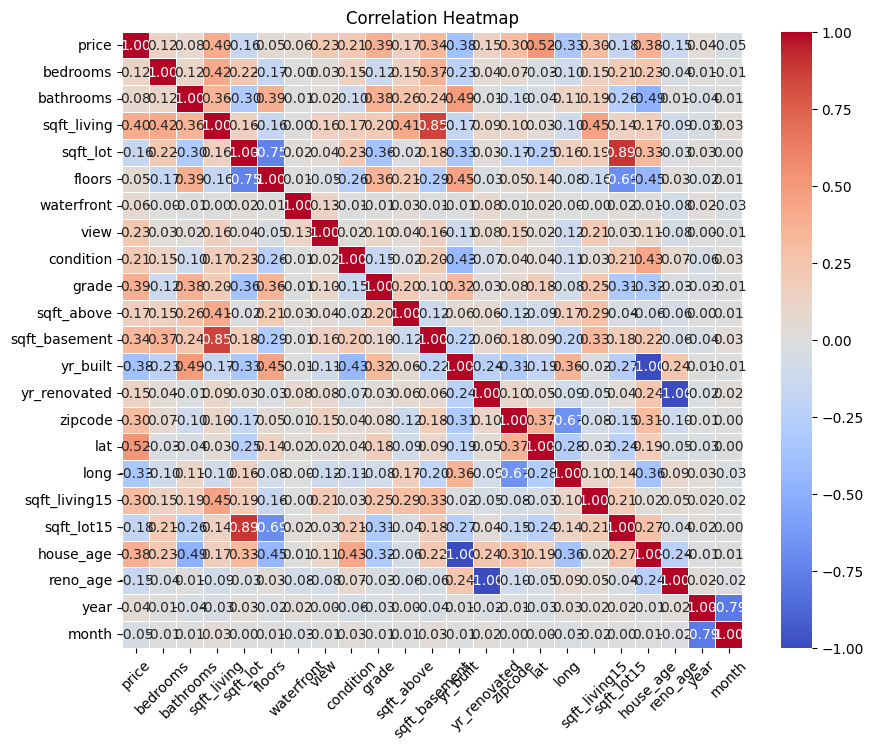

In [107]:
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(df_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

In [108]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'house_age', 'reno_age', 'year',
       'month'],
      dtype='object')

In [109]:
#  log 'price', 'sqft_living', 'sqft_above', 'sqft_living15'
df['log_price'] = np.log(df['price'])
df['log_sqft_living'] = np.log(df['sqft_living'])
df['log_sqft_lot'] =np.log(df['sqft_lot'])
df['log_sqft_above'] = np.log(df['sqft_above'])
df['log_sqft_living15'] = np.log(df['sqft_living15'])
df['log_sqft_basement'] = np.log(df['sqft_basement'])
df['log_sqft_lot15'] =np.log(df['sqft_lot15'])



C:\Users\mei88\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [110]:
df2 = df.drop(['price', 'sqft_living', 'sqft_above', 'sqft_lot','sqft_basement', 'sqft_living15','sqft_lot15'], axis=1)


In [111]:
df2.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'house_age', 'reno_age', 'year', 'month', 'log_price',
       'log_sqft_living', 'log_sqft_lot', 'log_sqft_above',
       'log_sqft_living15', 'log_sqft_basement', 'log_sqft_lot15'],
      dtype='object')

In [112]:
df2_corr = df2.corr()
df2_corr

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,...,reno_age,year,month,log_price,log_sqft_living,log_sqft_lot,log_sqft_above,log_sqft_living15,log_sqft_basement,log_sqft_lot15
bedrooms,1.000000,0.116730,-0.166477,-0.003932,0.027789,0.147182,-0.119357,-0.231157,0.040668,0.068965,...,-0.040668,0.013790,-0.005507,0.107579,0.415416,0.242637,0.149003,0.138419,0.371515,0.225788
bathrooms,0.116730,1.000000,0.389909,-0.007891,0.017475,-0.101759,0.377993,0.490599,-0.009494,-0.099684,...,0.009494,-0.044198,0.013340,0.093540,0.369073,-0.315120,0.260006,0.200366,0.103947,-0.285358
floors,-0.166477,0.389909,1.000000,0.008694,-0.046370,-0.255198,0.359013,0.452456,-0.030333,0.053794,...,0.030333,-0.023809,0.011075,0.082024,-0.149473,-0.791141,0.207081,-0.139842,-0.456564,-0.732758
waterfront,-0.003932,-0.007891,0.008694,1.000000,0.127007,-0.009887,-0.009111,-0.013554,0.080311,0.010726,...,-0.080311,0.024134,-0.030493,0.042023,0.006318,0.015710,0.026708,0.001300,NaN,0.017895
view,0.027789,0.017475,-0.046370,0.127007,1.000000,0.021012,0.101967,-0.109339,0.075030,0.152630,...,-0.075030,0.004063,-0.012427,0.202592,0.158269,0.042157,0.035956,0.191743,0.053770,0.040889
condition,0.147182,-0.101759,-0.255198,-0.009887,0.021012,1.000000,-0.149919,-0.430442,-0.072887,0.035533,...,0.072887,-0.055525,0.031113,0.185446,0.157768,0.254360,-0.017065,0.016582,0.240283,0.247048
grade,-0.119357,0.377993,0.359013,-0.009111,0.101967,-0.149919,1.000000,0.319068,0.028446,0.075988,...,-0.028446,-0.027716,-0.013423,0.401805,0.209585,-0.389068,0.204616,0.262195,-0.105672,-0.332665
yr_built,-0.231157,0.490599,0.452456,-0.013554,-0.109339,-0.430442,0.319068,1.000000,-0.235588,-0.307657,...,0.235588,0.008189,-0.012601,-0.343245,-0.150051,-0.415356,0.059179,-0.001841,-0.260124,-0.357804
yr_renovated,0.040668,-0.009494,-0.030333,0.080311,0.075030,-0.072887,0.028446,-0.235588,1.000000,0.096490,...,-1.000000,-0.024015,0.020767,0.129485,0.083075,0.054073,0.061593,-0.058600,0.079256,0.058410
zipcode,0.068965,-0.099684,0.053794,0.010726,0.152630,0.035533,0.075988,-0.307657,0.096490,1.000000,...,-0.096490,-0.005729,0.002433,0.318167,0.090052,-0.149407,-0.118728,-0.080669,0.027316,-0.124087


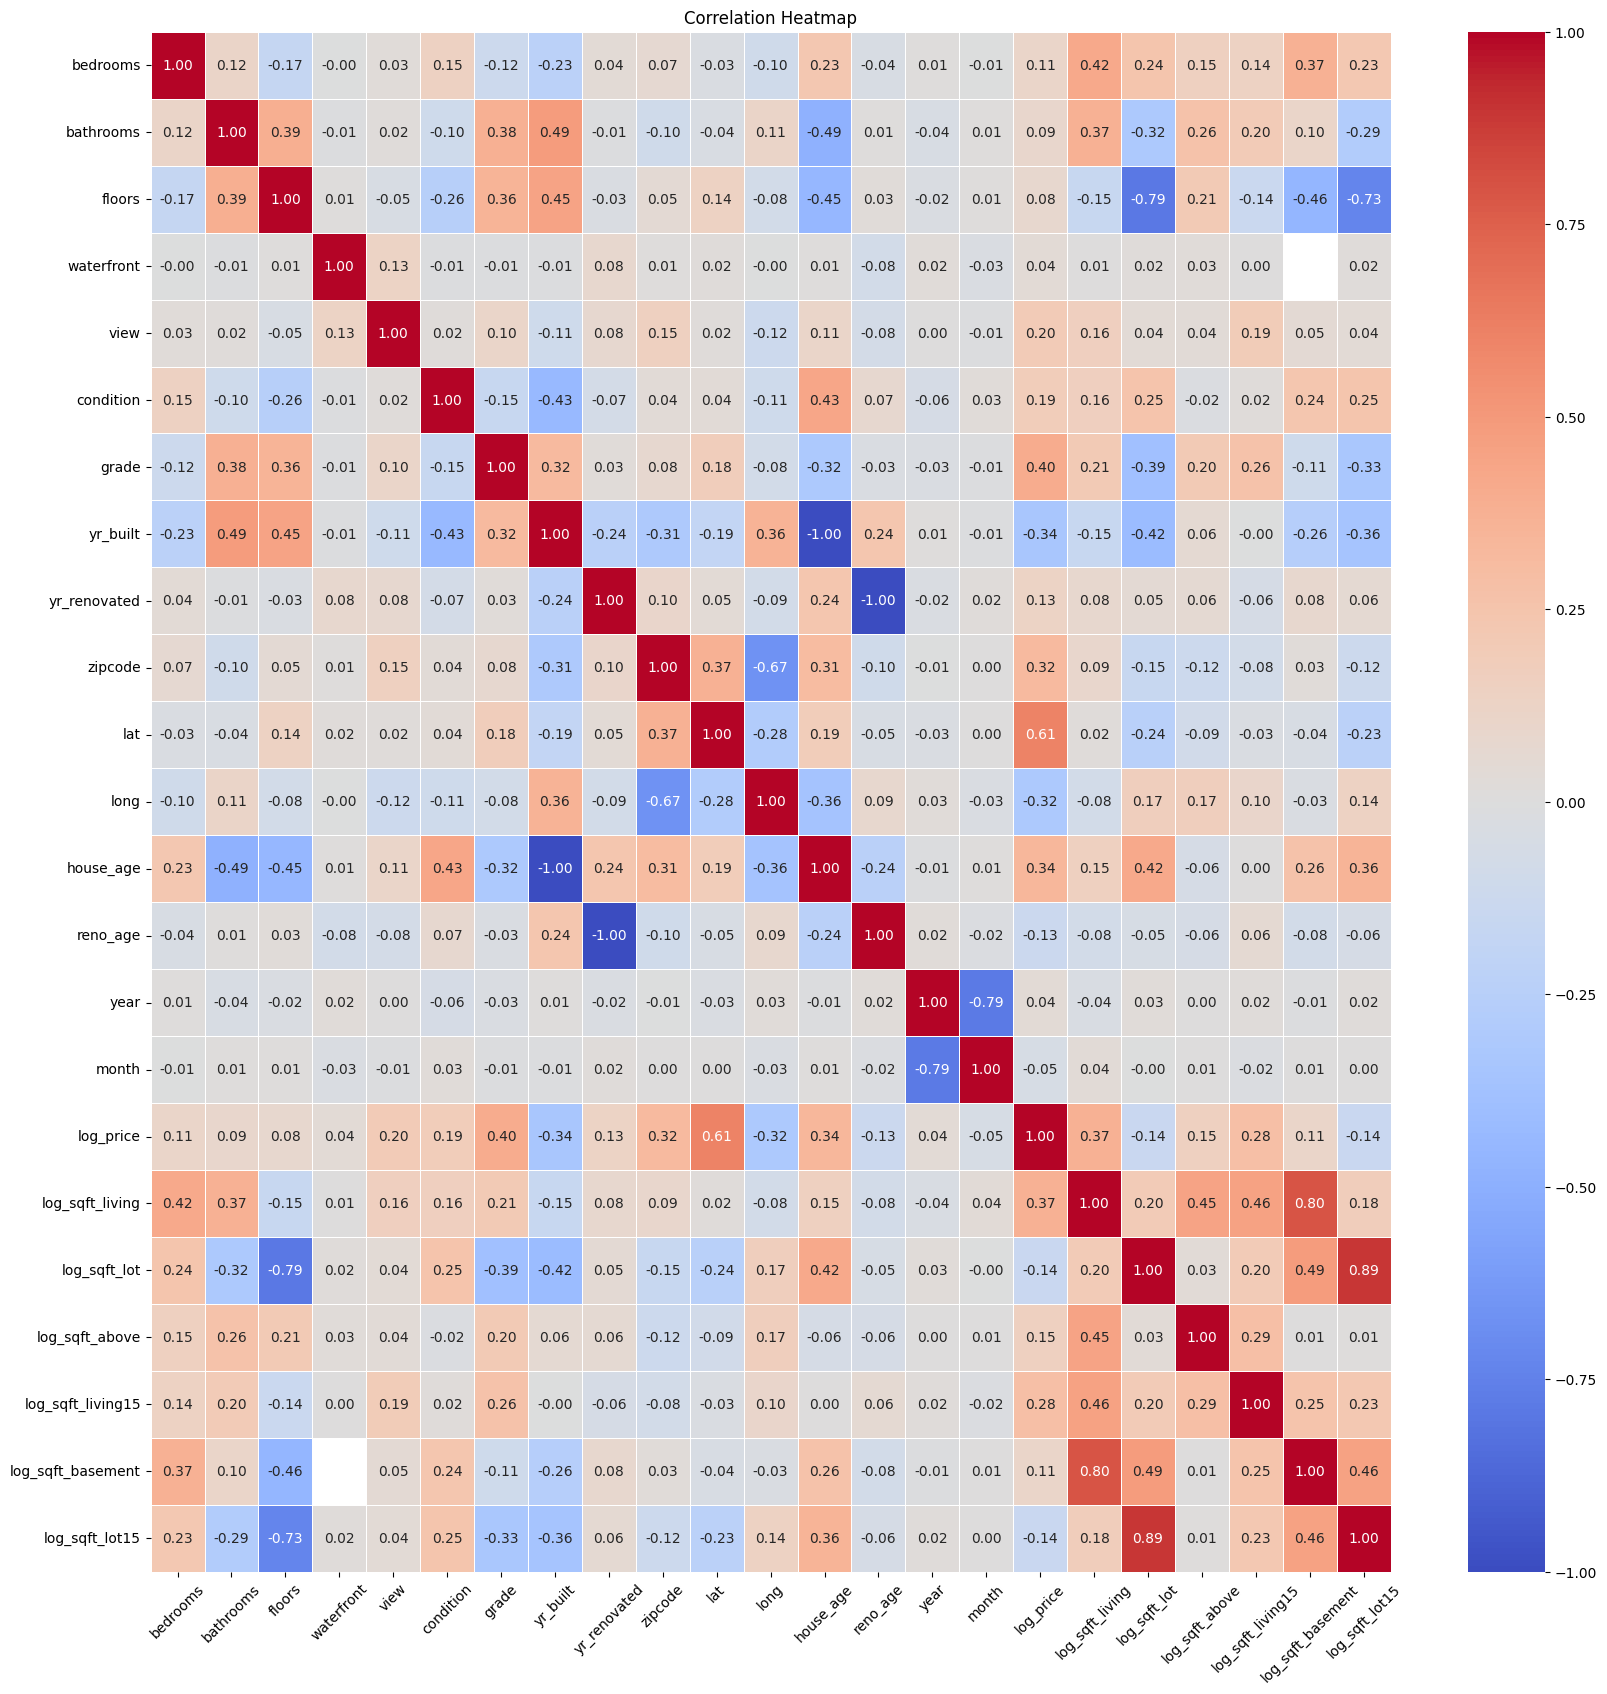

In [113]:

plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(df2_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

Log_sqft_lot and log_sqft_lot15 are highly correlated, we will only choose 1 then , after comparing, we will keep log_sqft_lot15 & log_sqft_living15

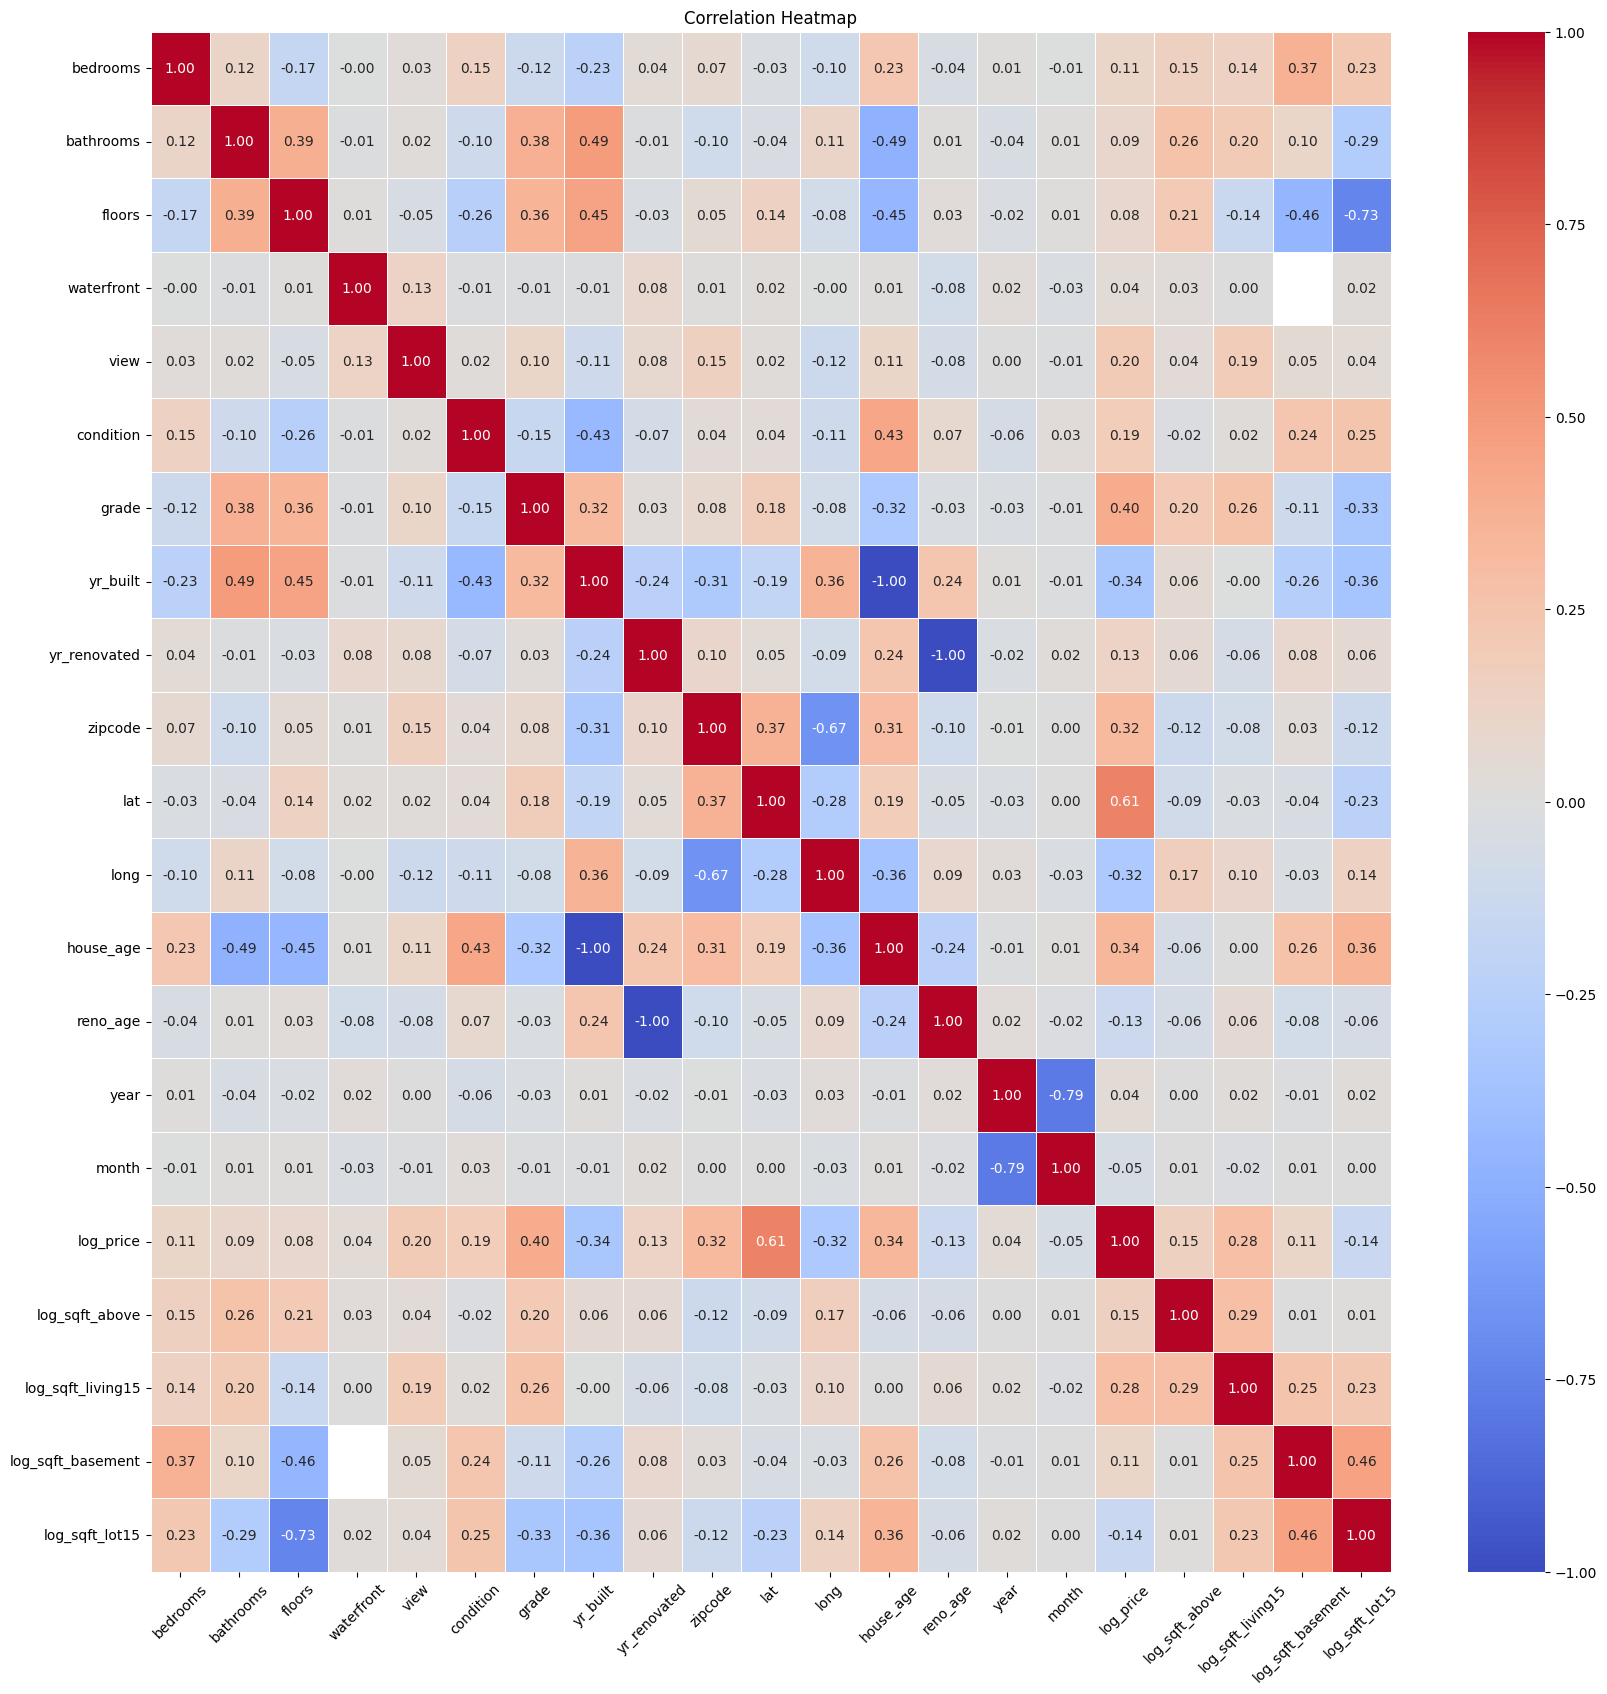

In [114]:
df3 = df2.drop(['log_sqft_living', 'log_sqft_lot'], axis=1)
df3_corr = df3.corr()
plt.figure(figsize=(20, 20))  # Set the figure size
sns.heatmap(df3_corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')  # Set the title of the heatmap
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)  # Keep y-axis labels as they are
plt.show()

we look at which variables' parameters

In [115]:
correlations = df3.corr()['log_price'].sort_values(ascending=False)
correlations

log_price            1.000000
lat                  0.608644
grade                0.401805
house_age            0.343245
zipcode              0.318167
log_sqft_living15    0.283419
view                 0.202592
condition            0.185446
log_sqft_above       0.151053
yr_renovated         0.129485
log_sqft_basement    0.109110
bedrooms             0.107579
bathrooms            0.093540
floors               0.082024
waterfront           0.042023
year                 0.040371
month               -0.052795
reno_age            -0.129485
log_sqft_lot15      -0.143241
long                -0.318365
yr_built            -0.343245
Name: log_price, dtype: float64

log_sqft_living, log_sqft_above, log_sqft_basement, log_sqft_lot, log_sqft_living15, log_sqft_lot15 are still correlated. 
so we need to remove these variables from the model. 

Run a OLS model, try different combination of variables and screened out below variables. 
zipcode, waterfront, month, log_sqft_basement, floor , reno_age, condition, long, bathroom

In [116]:
#dummies_view = pd.get_dummies(df3.view, prefix= 'view', dtype= int)
#dummies_waterfront = pd.get_dummies(df.waterfront, prefix='wf',dtype =int)
#dummies_grade = pd.get_dummies(df.grade, prefix='grade', dtype = int)
#dummies_bedrooms = pd.get_dummies(df3.bedrooms, prefix='bedrooms', dtype= int)
#dummies_year = pd.get_dummies(df3.year, prefix='year', dtype= int)
#df4 = pd.concat([df3,dummies_view,dummies_bedrooms,dummies_year], axis=1)


In [117]:
model_ols = ols('log_price ~  bedrooms + view +grade + lat + year +log_sqft_above + log_sqft_living15 + log_sqft_lot15 + house_age', data = df3)
result_model_ols = model_ols.fit()
print(result_model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     754.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        23:43:51   Log-Likelihood:                 171.19
No. Observations:                3527   AIC:                            -322.4
Df Residuals:                    3517   BIC:                            -260.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -168.7985     16.80

In [118]:
variables =['bedrooms','view', 'grade',  'lat',  'year', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15','house_age']
correlations = df3[variables].corr()
print(correlations)

                   bedrooms      view     grade       lat      year  \
bedrooms           1.000000  0.027789 -0.119357 -0.028958  0.013790   
view               0.027789  1.000000  0.101967  0.017877  0.004063   
grade             -0.119357  0.101967  1.000000  0.179265 -0.027716   
lat               -0.028958  0.017877  0.179265  1.000000 -0.026648   
year               0.013790  0.004063 -0.027716 -0.026648  1.000000   
log_sqft_above     0.149003  0.035956  0.204616 -0.089126  0.002556   
log_sqft_living15  0.138419  0.191743  0.262195 -0.026364  0.017293   
log_sqft_lot15     0.225788  0.040889 -0.332665 -0.232964  0.019033   
house_age          0.231157  0.109339 -0.319068  0.186189 -0.008189   

                   log_sqft_above  log_sqft_living15  log_sqft_lot15  \
bedrooms                 0.149003           0.138419        0.225788   
view                     0.035956           0.191743        0.040889   
grade                    0.204616           0.262195       -0.332665   
l

In [119]:
pred_val = result_model_ols.predict(df3[['bedrooms','view', 'grade',  'lat',  'year', 'log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15','house_age']])

In [120]:
pred_val.head(5)

6     12.484917
17    13.274362
25    12.244926
26    13.480590
27    13.437352
dtype: float64

In [121]:
res = pd.concat([pred_val.to_frame().rename(columns = {0:'predict_val'}), df3['log_price']],axis=1)
res['error'] = res['predict_val'] - res['log_price']
res['sq_error'] = res['error']**2

MSE_OSL = np.sqrt(res['sq_error'].mean())
print(MSE_OSL)
R2_OLS = r2_score(res['log_price'], res['predict_val'])
print("R2 Score: ", R2_OLS)

0.23050653308568753
R2 Score:  0.6588982165646711


(array([1.000e+00, 2.000e+01, 1.460e+02, 7.890e+02, 1.364e+03, 8.450e+02,
        2.900e+02, 5.700e+01, 1.200e+01, 3.000e+00]),
 array([-1.00523191, -0.78850987, -0.57178783, -0.35506579, -0.13834375,
         0.07837829,  0.29510033,  0.51182237,  0.72854441,  0.94526645,
         1.16198849]),
 <BarContainer object of 10 artists>)

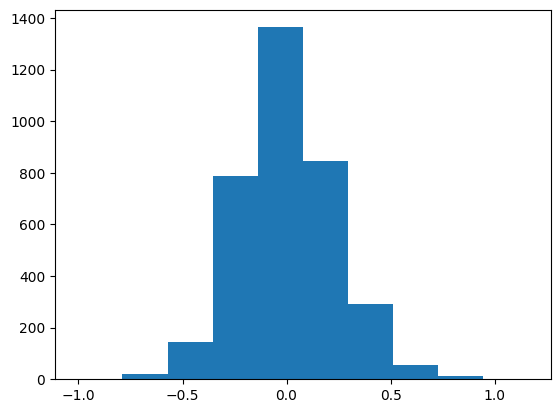

In [122]:
plt.hist(res['error'])


(array([ 16.,  64., 240., 536., 634., 827., 726., 371.,  97.,  16.]),
 array([11.69524702, 11.93984339, 12.18443976, 12.42903612, 12.67363249,
        12.91822886, 13.16282523, 13.40742159, 13.65201796, 13.89661433,
        14.1412107 ]),
 <BarContainer object of 10 artists>)

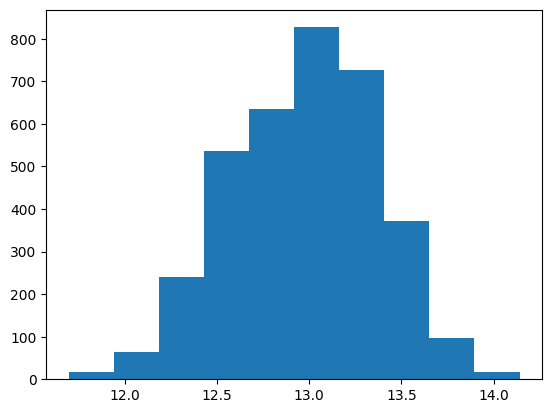

In [123]:
plt.hist(df3['log_price'])


Text(0.5, 0, 'view')

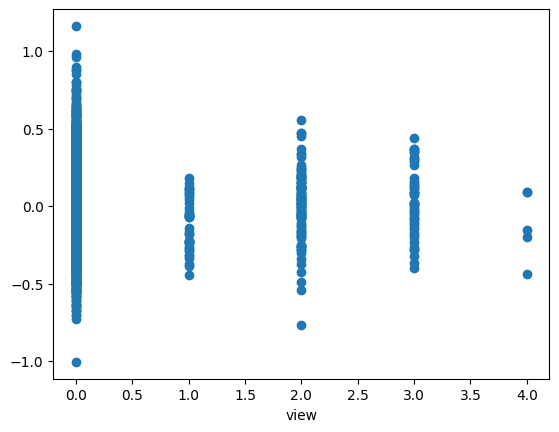

In [124]:
plt.scatter(df3['view'], res['error'])
plt.xlabel('view')

Text(0.5, 0, 'grade')

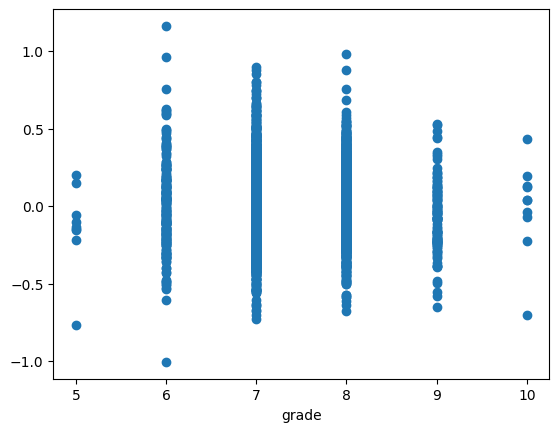

In [125]:
plt.scatter(df3['grade'], res['error'])
plt.xlabel('grade')

Text(0.5, 0, 'lat')

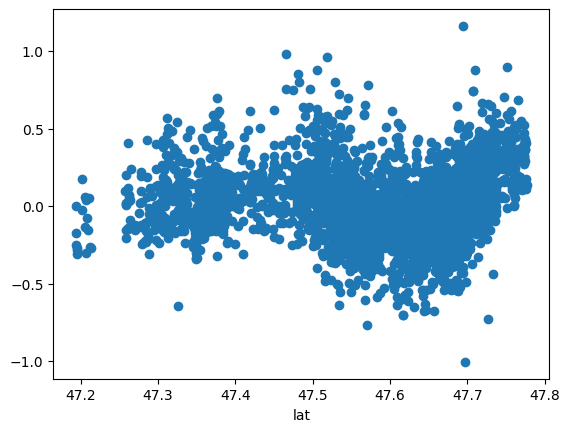

In [126]:
plt.scatter(df3['lat'], res['error'])
plt.xlabel('lat')

Text(0.5, 0, 'year')

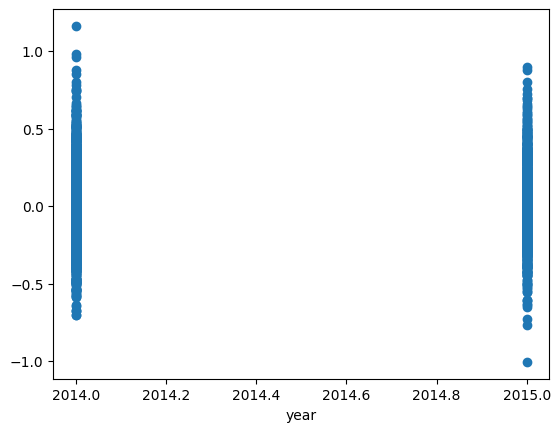

In [127]:
plt.scatter(df3['year'], res['error'])
plt.xlabel('year')

Text(0.5, 0, 'log_sqft_above')

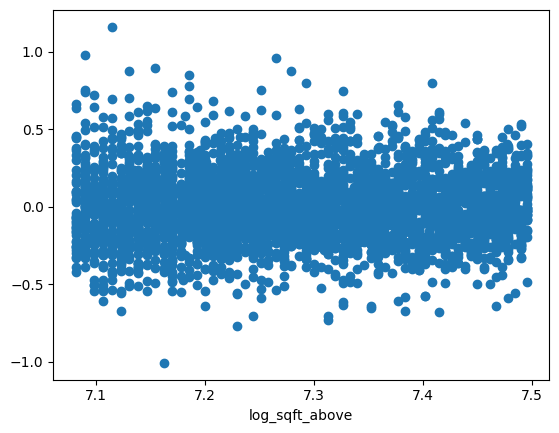

In [128]:
plt.scatter(df3['log_sqft_above'], res['error'])
plt.xlabel('log_sqft_above')

Text(0.5, 0, 'log_sqft_living15')

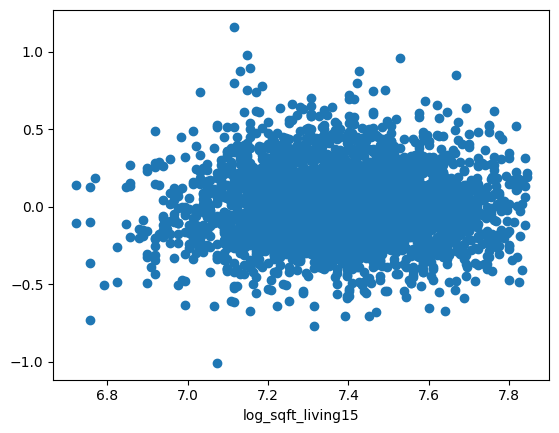

In [129]:
plt.scatter(df3['log_sqft_living15'], res['error'])
plt.xlabel('log_sqft_living15')

Text(0.5, 0, 'log_sqft_lot15')

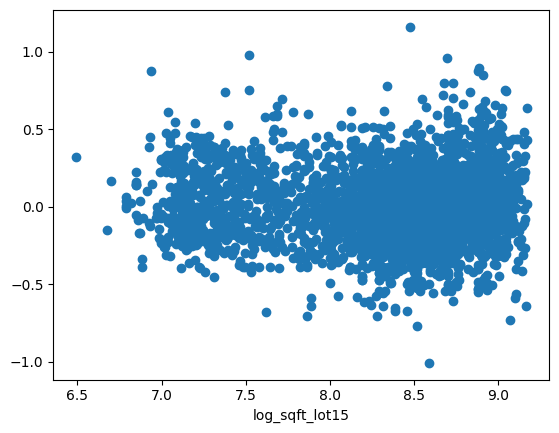

In [130]:
plt.scatter(df3['log_sqft_lot15'], res['error'])
plt.xlabel('log_sqft_lot15')

Text(0.5, 0, 'house_age')

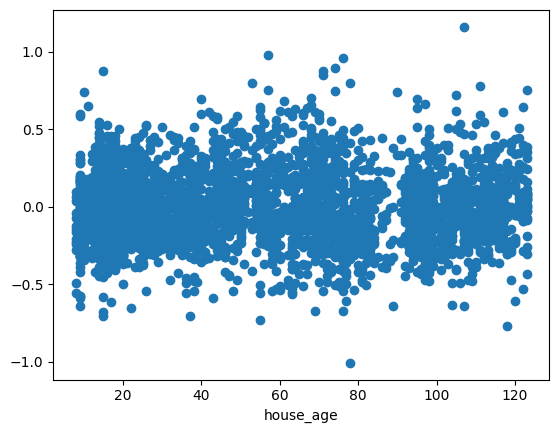

In [131]:
plt.scatter(df3['house_age'], res['error'])
plt.xlabel('house_age')

((array([-3.5447314 , -3.30376139, -3.17065333, ...,  3.17065333,
          3.30376139,  3.5447314 ]),
  array([-1.00523191, -0.76727409, -0.72621866, ...,  0.96126244,
          0.98298594,  1.16198849])),
 (0.229696760107831, -2.5241894703656795e-13, 0.995578792330129))

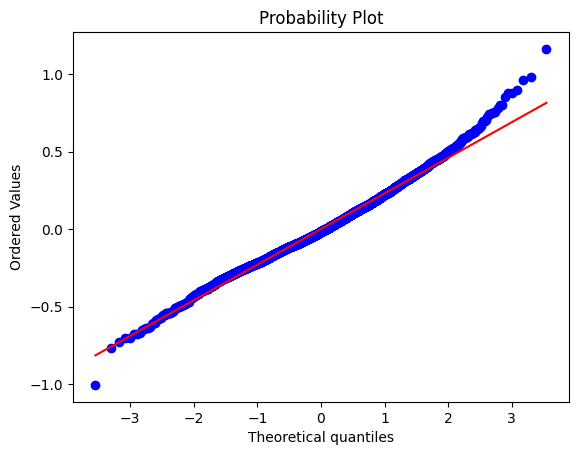

In [132]:
import scipy. stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist ='norm', plot = ax)


In [133]:
infl = result_model_ols.get_influence()
print(infl.summary_frame().head())

    dfb_Intercept  dfb_bedrooms  dfb_view  dfb_grade   dfb_lat  dfb_year  \
6       -0.001777      0.001246  0.000749   0.001851  0.003058  0.001542   
17      -0.008501     -0.011935  0.004776   0.004939 -0.004913  0.009171   
25       0.007644     -0.004786  0.002165  -0.009138 -0.016775 -0.006080   
26       0.012427     -0.013888 -0.012439   0.019545 -0.005165 -0.012457   
27      -0.001372      0.000963  0.001507  -0.002579  0.001314  0.001252   

    dfb_log_sqft_above  dfb_log_sqft_living15  dfb_log_sqft_lot15  \
6            -0.001759              -0.003201           -0.000022   
17           -0.011005               0.000127            0.007455   
25            0.018034              -0.018810           -0.003150   
26            0.028087               0.001978           -0.010936   
27            0.001284              -0.001633            0.001315   

    dfb_house_age   cooks_d  standard_resid  hat_diag  dffits_internal  \
6        0.000890  0.000004       -0.113435  0.003264 

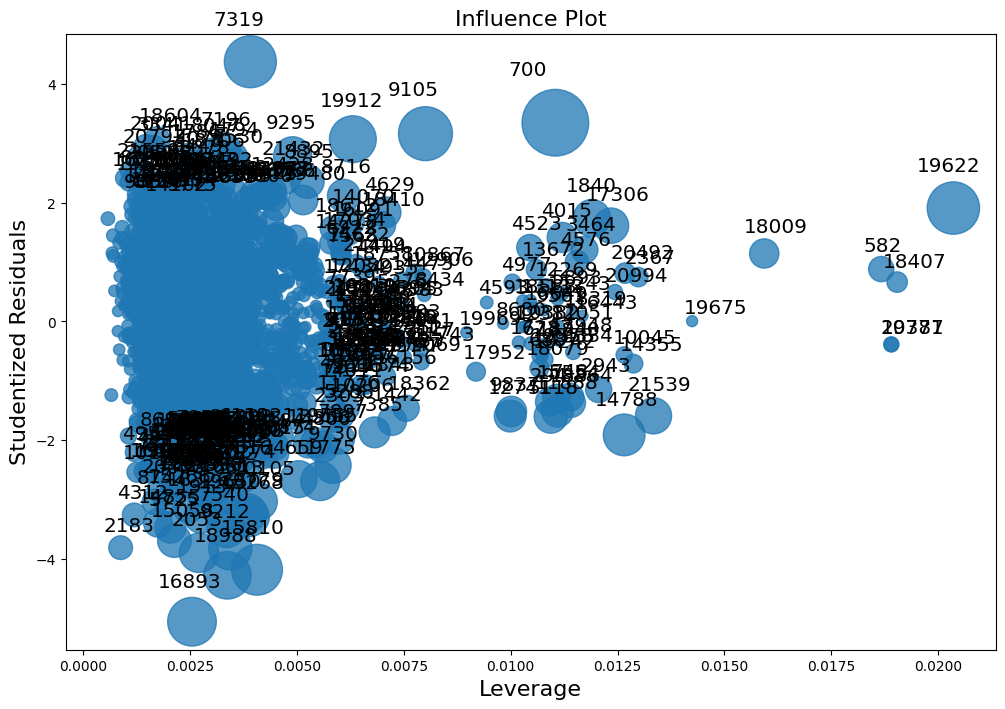

In [134]:
# this is the updated plot after dropping influencers
fig, ax = plt.subplots(figsize = (12,8))
fig = sm.graphics.influence_plot(result_model_ols, ax=ax, criterion='cooks')

In [135]:
res.head()

,predict_val,log_price,error,sq_error
6,12.484917,12.458775,0.026142,0.000683
17,13.274362,13.091904,0.182458,0.033291
25,12.244926,12.358794,-0.113868,0.012966
26,13.480590,13.750439,-0.269849,0.072818
27,13.437352,13.410545,0.026807,0.000719


Feature engineering & build models

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
import numpy as np

In [137]:
df3.head()

,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,...,long,house_age,reno_age,year,month,log_price,log_sqft_above,log_sqft_living15,log_sqft_basement,log_sqft_lot15
6,3,2.25,2.0,0,0,3,7,1995,0,98003,...,-122.327,28,2023,2014,6,12.458775,7.447168,7.713338,-inf,8.827468
17,4,1.00,1.5,0,0,4,7,1916,0,98103,...,-122.343,107,2023,2014,5,13.091904,7.377759,7.383989,-inf,8.366370
25,3,2.00,1.5,0,0,5,6,1941,0,98002,...,-122.218,82,2023,2014,11,12.358794,7.444249,6.937314,-inf,8.456381
26,3,1.75,2.0,0,0,3,8,1915,0,98119,...,-122.360,108,2023,2014,6,13.750439,7.467371,7.473069,6.55108,8.181161
27,3,1.00,1.5,0,0,5,8,1909,0,98112,...,-122.314,114,2023,2014,12,13.410545,7.244228,7.528332,-inf,8.258681


Variables we used in OLS model: log_price ~  bedrooms + view +grade + lat + year +log_sqft_above + log_sqft_living15 + log_sqft_lot15 + house_age

In [138]:
# seperate features and target 
categorical_features = ['view', 'grade','year']
numerical_features = ['lat','bedrooms','log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15', 'house_age']
target = 'log_price'

In [139]:
# split date in train/test
X_train, X_test, y_train, y_test = train_test_split(df3[categorical_features + numerical_features], df3[target], test_size =0.3, random_state =1234)
#define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps =[('scaler', StandardScaler())])
#building processor
preprocessor = ColumnTransformer(transformers=[('cat',cat_transformer, categorical_features),('num', num_transformer, numerical_features)])

In [140]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', LinearRegression())])

In [141]:
pred_ln = linear_regression.predict(X_test)
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(pred_ln, y_test))
MSE_LR = np.sqrt(mean_squared_error(pred_ln, y_test))
print('MSE_LR', MSE_LR)
r2_score_ln = r2_score(y_test, pred_ln)
print("R2 Score: ", r2_score_ln)

MSE_LR 0.2307352907500863
R2 Score:  0.6529049696534641


In [142]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor), 
    ('regressor', Ridge(alpha =3.0))
])


ridge_regression.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', Ridge(alpha=3.0))])

In [143]:
pred_ridge = ridge_regression.predict(X_test)
np.sqrt(mean_squared_error(pred_ridge, y_test))
MSE_RG = np.sqrt(mean_squared_error(pred_ridge, y_test))
print(MSE_RG)
r2_score_rg = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)



0.231280269858688
R2 Score:  0.6512634094932856


In [144]:
lasso_regression = Pipeline(steps =[
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha = 1.0))
])

lasso_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', Lasso())])

In [145]:
lasso_pred = lasso_regression.predict(X_test)
np.sqrt(mean_squared_error(lasso_pred, y_test))
MSE_LS = np.sqrt(mean_squared_error(lasso_pred, y_test))
print(MSE_LS)
r2_score_la = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)

0.39188029312434824
R2 Score:  0.6512634094932856


In [146]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio = 0.8))
])

elasticnet_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['view', 'grade', 'year']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['lat', 'bedrooms',
                                                   'log_sqft_above',
                                                   'log_sqft_living15',
                                                   'log_sqft_lot15',
                                                   'house_age'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [147]:
elasticnet_pred = elasticnet_regression.predict(X_test)
np.sqrt(mean_squared_error(elasticnet_pred, y_test))
MSE_EL = np.sqrt(mean_squared_error(elasticnet_pred, y_test))
print(MSE_EL)
r2_score_el = r2_score(y_test, pred_ridge)
print("R2 Score: ", r2_score_rg)

0.39188029312434824
R2 Score:  0.6512634094932856


In [148]:
y_test.head()

15571    13.337475
19406    12.468437
2010     12.513557
16586    12.929991
4356     13.738953
Name: log_price, dtype: float64

In [149]:
elastic_net_pred = pd.concat([pd.DataFrame(elasticnet_pred).rename(columns={0:'pred'}),y_test.reset_index().drop('index',axis=1).rename(columns={0:'actual'})], axis=1)

In [150]:
elastic_net_pred['res'] = elastic_net_pred['pred'] - elastic_net_pred['log_price']

categorical_features = ['view', 'grade','year']
numerical_features = ['lat','bedrooms','log_sqft_above', 'log_sqft_living15', 'log_sqft_lot15', 'house_age']

Text(0.5, 1.0, 'log_sqft_living15')

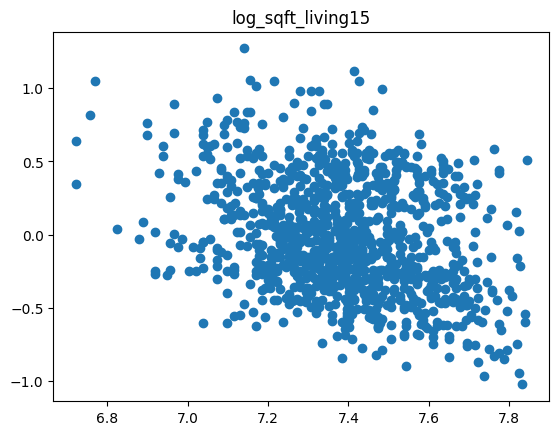

In [151]:
plt.scatter(X_test['log_sqft_living15'], elastic_net_pred['res'])
plt.title('log_sqft_living15')

Text(0.5, 1.0, 'house_age')

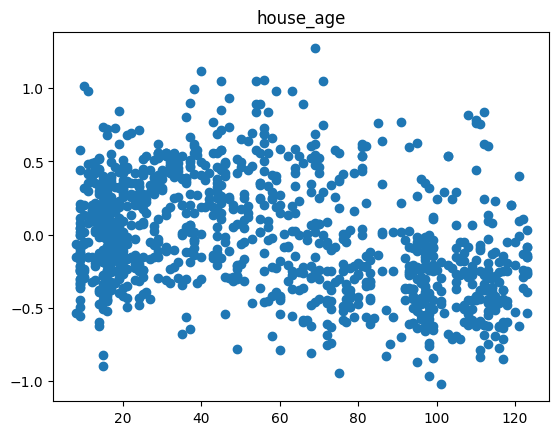

In [152]:
plt.scatter(X_test['house_age'], elastic_net_pred['res'])
plt.title('house_age')

Text(0.5, 1.0, 'log_sqft_lot15')

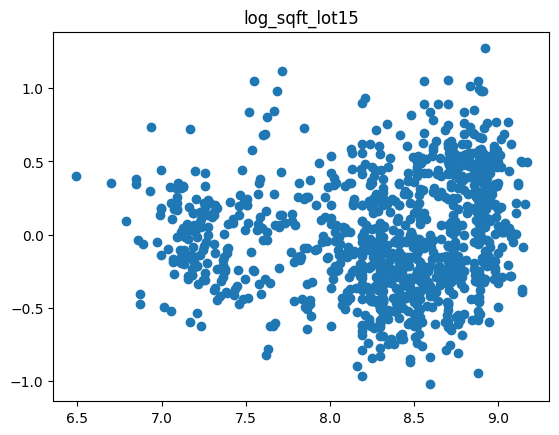

In [153]:
plt.scatter(X_test['log_sqft_lot15'], elastic_net_pred['res'])
plt.title('log_sqft_lot15')

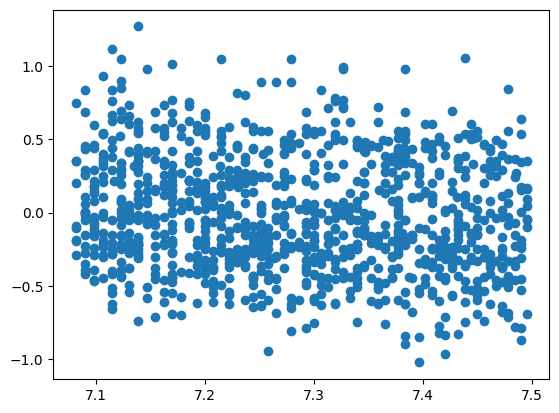

In [154]:
plt.scatter(X_test['log_sqft_above'], elastic_net_pred['res'])

Text(0.5, 1.0, 'lat')

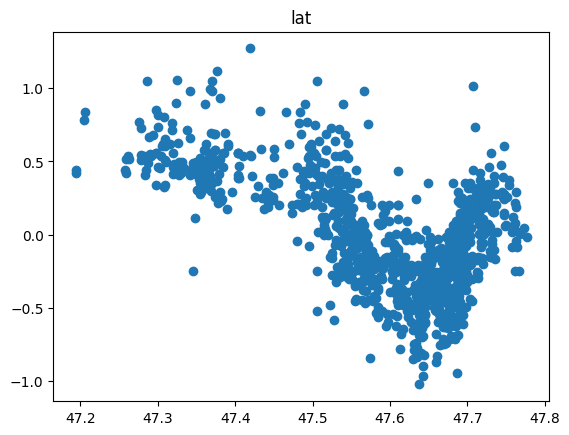

In [155]:
plt.scatter(X_test['lat'], elastic_net_pred['res'])
plt.title('lat')

Summarize the performance of all models

In [156]:
print({'MSE_OSL': MSE_OSL, 'MSE_LR':MSE_LR, 'MSE_RG': MSE_RG,  'MSE_LS': MSE_LS,'MSE_EL': MSE_LR})
print({'R2_OLS': R2_OLS, 'r2_score_ln': r2_score_ln, 'r2_score_rg': r2_score_rg, 'r2_score_la' : r2_score_la, 'r2_score_el': r2_score_el})

{'MSE_OSL': 0.23050653308568753, 'MSE_LR': 0.2307352907500863, 'MSE_RG': 0.231280269858688, 'MSE_LS': 0.39188029312434824, 'MSE_EL': 0.2307352907500863}
{'R2_OLS': 0.6588982165646711, 'r2_score_ln': 0.6529049696534641, 'r2_score_rg': 0.6512634094932856, 'r2_score_la': 0.6512634094932856, 'r2_score_el': 0.6512634094932856}


First all, I checked the data distribution.

Second, I conducted data cleaning by , remove outliers, drop unneccessary columns, create new meaning columns, convert datatype, convert dummie variables.

Then checked the correlation between variabls, decide to log the price and varaibles related with sqft to normalize the distribution

The most important parts is to play around with combination of variables using OSL model to identify the variables used for building the model by check their P-value, removed those variables with P-value greater than 5%. 

After the data cleaning and identify variables. I build OSL, Ridge, LASSO, and Elastic models, and checked the influencers, leveraging, residual plots. 

Overall, in my analysis, OSL model perform thee best result with the least MSE and the best R2_score


By exclude some variables with high correlation which caused multicolleanrity, and check the coeeficience in OLS summary report and by checking the correlationship between independent variables and dependent variable. we found 'lat' which reprents location impact the price the most, the other impacting orders from high to low are: log_sqft_living 15, log_sqft_above, grade, view, year(selling year), house_age, bedrooms, however, log_sqft_lot15 have negative impact to price. 
